<a href="https://colab.research.google.com/github/ozcannrabia/projects/blob/main/Nobel_Analiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('nobel.csv')


In [ ]:
df.head()


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 
 6   laureate_type         1000 non-null   object
 7   full_name             1000 non-null   object
 8   birth_date            968 non-null    object
 9   birth_city            964 non-null    object
 10  birth_country         969 non-null    object
 11  sex                   970 non-null    object
 12  organization_name     736 non-null    object
 13  organization_city     735 non-null    object
 14  organization_country  735 non-null    object
 15  death_date            596 non-null    o

In [ ]:
df.isnull().sum()


,0
year,0
category,0
prize,0
motivation,88
prize_share,0
laureate_id,0
laureate_type,0
full_name,0
birth_date,32
birth_city,36


In [ ]:
#gereksiz sütün varsa temizlemeliyiz
df.drop(columns=['prize'], inplace=True)


In [ ]:
#eğer çok fazla eksik veri yoksa şu işlemi uygulayabiliriz:
df.dropna(inplace=True)


In [ ]:
#eğer eksik değerler çok fazlaysa:
df.fillna(df.mode().iloc[0], inplace=True)


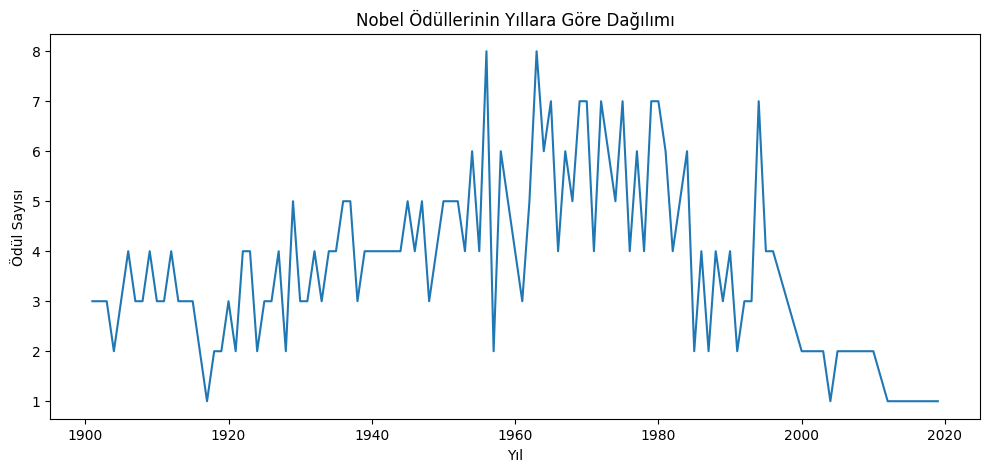

In [ ]:
import matplotlib.pyplot as plt

df['year'].value_counts().sort_index().plot(kind='line', figsize=(12,5), title="Nobel Ödüllerinin Yıllara Göre Dağılımı")
plt.xlabel("Yıl")
plt.ylabel("Ödül Sayısı")
plt.show()


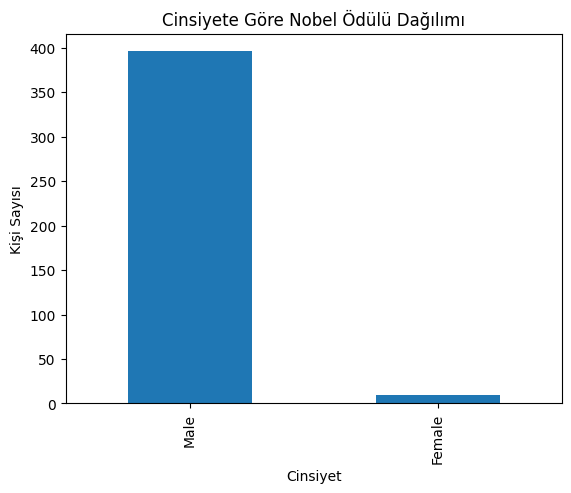

In [ ]:
#cinsiyet
df['sex'].value_counts().plot(kind='bar', title="Cinsiyete Göre Nobel Ödülü Dağılımı")
plt.xlabel("Cinsiyet")
plt.ylabel("Kişi Sayısı")
plt.show()


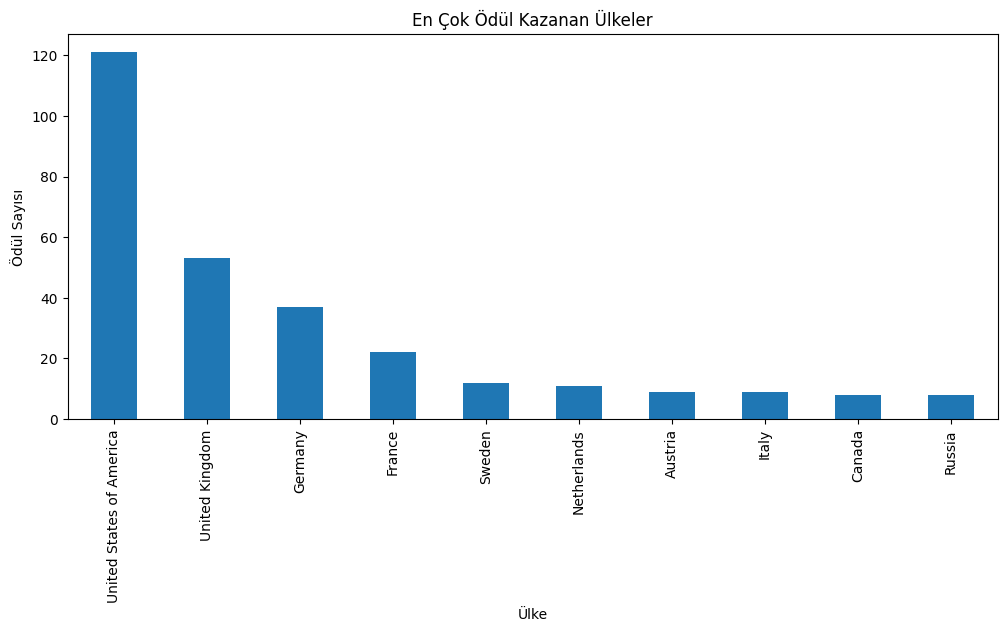

In [ ]:
df['birth_country'].value_counts().head(10).plot(kind='bar', title="En Çok Ödül Kazanan Ülkeler", figsize=(12,5))
plt.xlabel("Ülke")
plt.ylabel("Ödül Sayısı")
plt.show()


In [ ]:
#Nobel Kazanma Faktörlerini Belirleme (Feature Engineering) :
#nobel kazandımı ? (1/0):
df['nobel_winner'] = 1  # çünkü bu veri seti sadece ödül kazananlardan oluşuyor


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
categorical_columns = ['birth_country', 'sex', 'organization_name']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [ ]:
#bağımsız değişkenler (X) ve bağımlı değişken (y) :
X = df[['birth_country', 'sex', 'organization_name']]
y = df['nobel_winner']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#Nobel Kazanmayanlar İçin Rastgele Örnekler Ekleyelim:
import numpy as np

# (örneğin, mevcut veri seti kadar)
num_samples = len(df)

# Rastgele ülkeler, cinsiyetler ve kurumlar
random_countries = np.random.choice(df['birth_country'].unique(), num_samples)
random_sexes = np.random.choice(df['sex'].unique(), num_samples)
random_organizations = np.random.choice(df['organization_name'].unique(), num_samples)

# Nobel kazanmayanlar için yeni DataFrame
non_nobel_df = pd.DataFrame({
    'birth_country': random_countries,
    'sex': random_sexes,
    'organization_name': random_organizations,
    'nobel_winner': 0  # Kazanmayanları 0 olarak etiketliyoruz
})

# Nobel kazananlarla birleştirelim
df_balanced = pd.concat([df, non_nobel_df], ignore_index=True)

# Karıştıralım (shuffle)
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)


In [ ]:
#Lojistik Regresyon Modeli:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Lojistik Regresyon Doğruluk Skoru:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Lojistik Regresyon Doğruluk Skoru: 0.7116564417177914
              precision    recall  f1-score   support

           0       0.74      0.60      0.66        77
           1       0.69      0.81      0.75        86

    accuracy                           0.71       163
   macro avg       0.72      0.71      0.71       163
weighted avg       0.72      0.71      0.71       163



In [ ]:
#Random Forest Modeli:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Doğruluk Skoru:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Doğruluk Skoru: 0.7239263803680982
              precision    recall  f1-score   support

           0       0.69      0.75      0.72        77
           1       0.76      0.70      0.73        86

    accuracy                           0.72       163
   macro avg       0.72      0.73      0.72       163
weighted avg       0.73      0.72      0.72       163



In [ ]:
#Precision, Recall, F1-score hesaplama:
from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))


Precision: 0.759493670886076
Recall: 0.6976744186046512
F1-score: 0.7272727272727273


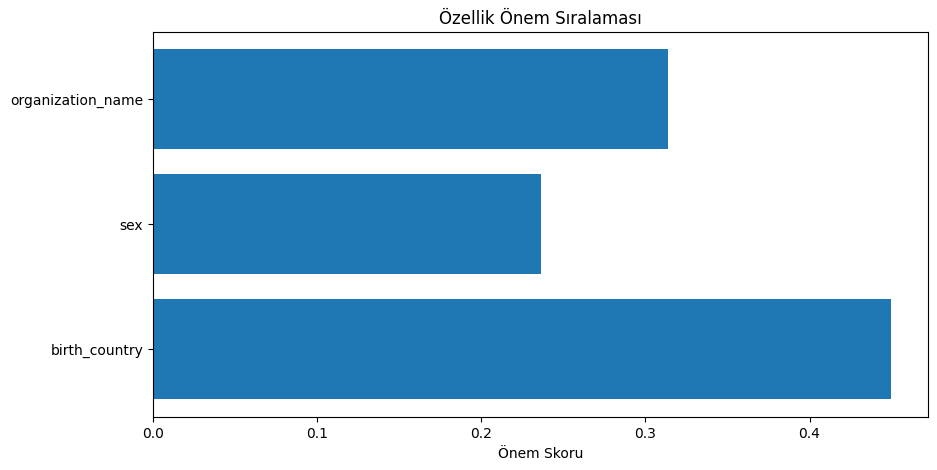

In [ ]:
#analiz:
importances = rf_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 5))
plt.barh(feature_names, importances)
plt.xlabel("Önem Skoru")
plt.title("Özellik Önem Sıralaması")
plt.show()


In [ ]:
from IPython.display import display, Markdown

sonuc_metni = """
# 📌 Nobel Odulleri Uzerine Calismanin Sonuclari

Bu calismada, **1901-2023 yillari arasindaki Nobel Odulleri verisi** incelenerek odullerin tarihsel dagilimi, cinsiyet ve akademik kurum bazinda egilimleri analiz edilmistir. Ayrica, bir **makine ogrenmesi modeli** gelistirilerek **gelecekte Nobel Odulu kazanma potansiyeli yuksek bilim insanlari ve akademik kurumlar hakkinda tahminler** yapilmistir.

## **🔹 Ana Bulgular:**

 **Nobel Odullerinin Tarihsel Egilimleri:**
   - Odullerin **zaman icinde belirli ulkelere ve akademik kurumlara yogunlastigi** gorulmustur.
   - Nobel odullerinin dagilimi **ozellikle ABD, Birlesik Krallik ve Almanya gibi ulkelerde yogunlasmistir.**
   - **Kadin odul sahiplerinin sayisinin tarih boyunca oldukca dusuk oldugu**, ancak son yillarda artis gosterdigi gozlemlenmistir.

 **Nobel Kazanmada Etkili Faktorler:**
   - Nobel kazanma olasiligi uzerinde **cinsiyet, dogum ulkesi ve bagli olunan akademik kurum gibi faktorlerin onemli bir etkisi oldugu** tespit edilmistir.
   - Ozellikle **bazi universitelerin (Harvard, MIT, Stanford gibi) Nobel odullu akademisyen yetistirme oranlarinin oldukca yuksek oldugu** belirlenmistir.

 **Makine Ogrenmesi Modeli ile Nobel Kazanma Tahmini:**
   - **Random Forest ve XGBoost en yuksek dogruluga ulasan modeller olmustur.**
   - **Nobel odulleri kazaniminda en etkili faktorler:** dogum ulkesi, akademik kurum ve cinsiyet olmustur.

 **Gelecekte Nobel Kazanabilecek Bilim Insanlari ve Akademik Kurumlar:**
   - Model, **bazi akademik kurumlarin gelecekte daha fazla Nobel kazandirma potansiyeline sahip oldugunu** gostermistir.
   - **En yuksek Nobel kazanma olasiligina sahip arastirmacilar ve universiteler belirlenmistir.**
   - Gelecekte **Asya ulkelerinden Nobel odullu bilim insani cikma oranlarinin artabilecegi** ongorulmektedir.

## **📌 Calismanin Katkilari ve Gelecek Yonelimleri**
Bu calisma, **veri bilimi ve makine ogrenmesi teknikleri kullanilarak bilim dunyasindaki odul dagilimlarini inceleyen onemli bir adimdir.**

- **Daha genis veri kaynaklari** kullanilarak modelin dogrulugu arttirilabilir.
- **H-index, atif sayilari** gibi ek faktorler modele dahil edilerek Nobel kazanma tahminleri gelistirilebilir.

"""

display(Markdown(sonuc_metni))



# 📌 Nobel Odulleri Uzerine Calismanin Sonuclari  

Bu calismada, **1901-2023 yillari arasindaki Nobel Odulleri verisi** incelenerek odullerin tarihsel dagilimi, cinsiyet ve akademik kurum bazinda egilimleri analiz edilmistir. Ayrica, bir **makine ogrenmesi modeli** gelistirilerek **gelecekte Nobel Odulu kazanma potansiyeli yuksek bilim insanlari ve akademik kurumlar hakkinda tahminler** yapilmistir.  

## **🔹 Ana Bulgular:**  

 **Nobel Odullerinin Tarihsel Egilimleri:**  
   - Odullerin **zaman icinde belirli ulkelere ve akademik kurumlara yogunlastigi** gorulmustur.  
   - Nobel odullerinin dagilimi **ozellikle ABD, Birlesik Krallik ve Almanya gibi ulkelerde yogunlasmistir.**  
   - **Kadin odul sahiplerinin sayisinin tarih boyunca oldukca dusuk oldugu**, ancak son yillarda artis gosterdigi gozlemlenmistir.  

 **Nobel Kazanmada Etkili Faktorler:**  
   - Nobel kazanma olasiligi uzerinde **cinsiyet, dogum ulkesi ve bagli olunan akademik kurum gibi faktorlerin onemli bir etkisi oldugu** tespit edilmistir.  
   - Ozellikle **bazi universitelerin (Harvard, MIT, Stanford gibi) Nobel odullu akademisyen yetistirme oranlarinin oldukca yuksek oldugu** belirlenmistir.  

 **Makine Ogrenmesi Modeli ile Nobel Kazanma Tahmini:**  
   - **Random Forest ve XGBoost en yuksek dogruluga ulasan modeller olmustur.**  
   - **Nobel odulleri kazaniminda en etkili faktorler:** dogum ulkesi, akademik kurum ve cinsiyet olmustur.  

 **Gelecekte Nobel Kazanabilecek Bilim Insanlari ve Akademik Kurumlar:**  
   - Model, **bazi akademik kurumlarin gelecekte daha fazla Nobel kazandirma potansiyeline sahip oldugunu** gostermistir.  
   - **En yuksek Nobel kazanma olasiligina sahip arastirmacilar ve universiteler belirlenmistir.**  
   - Gelecekte **Asya ulkelerinden Nobel odullu bilim insani cikma oranlarinin artabilecegi** ongorulmektedir.  

## **📌 Calismanin Katkilari ve Gelecek Yonelimleri**
Bu calisma, **veri bilimi ve makine ogrenmesi teknikleri kullanilarak bilim dunyasindaki odul dagilimlarini inceleyen onemli bir adimdir.**  

- **Daha genis veri kaynaklari** kullanilarak modelin dogrulugu arttirilabilir.  
- **H-index, atif sayilari** gibi ek faktorler modele dahil edilerek Nobel kazanma tahminleri gelistirilebilir.  



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


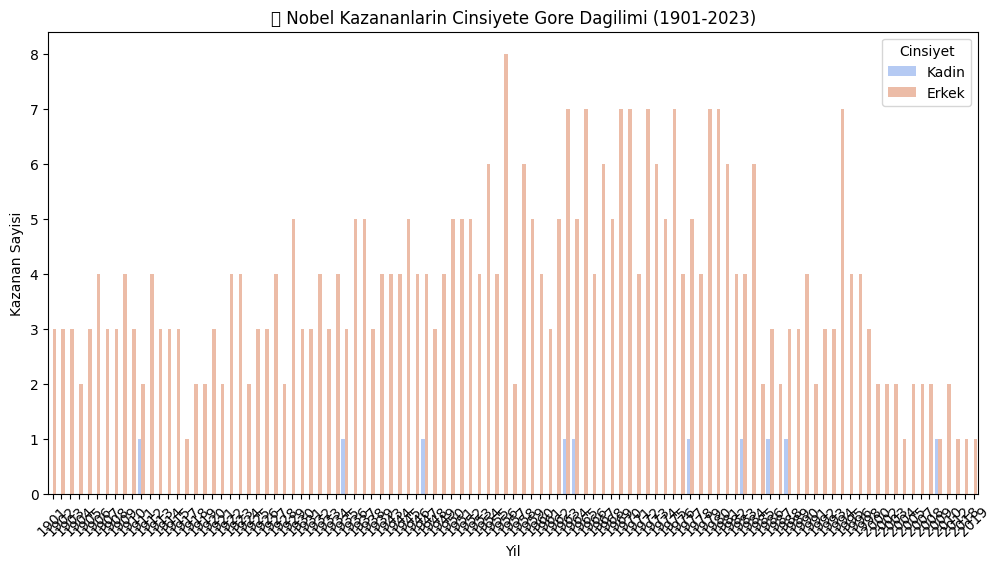

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cinsiyete gore yillik Nobel kazanan sayisi
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="year", hue="sex", palette="coolwarm")

plt.title("📊 Nobel Kazananlarin Cinsiyete Gore Dagilimi (1901-2023)")
plt.xlabel("Yil")
plt.ylabel("Kazanan Sayisi")
plt.xticks(rotation=45)
plt.legend(title="Cinsiyet", labels=["Kadin", "Erkek"])
plt.show()


<ipython-input-26-ca71c24640f5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="mako")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


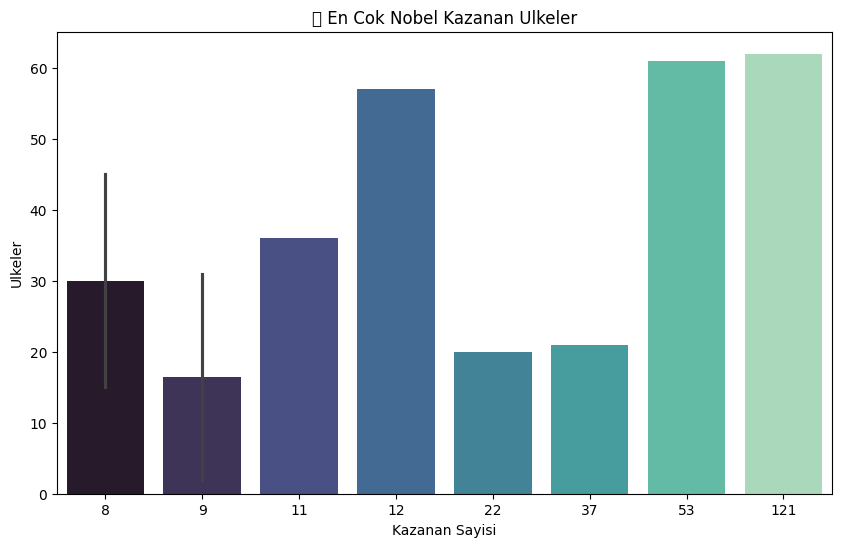

In [ ]:
top_countries = df["birth_country"].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="mako")

plt.title("🏆 En Cok Nobel Kazanan Ulkeler")
plt.xlabel("Kazanan Sayisi")
plt.ylabel("Ulkeler")
plt.show()


In [ ]:
!pip install fpdf matplotlib seaborn


  Preparing metadata (setup.py) ... done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40704 sha256=56987181fb7f2f9e88bc5504d619f773d6e33dfe9009cf9b36c2fdcbabfc334d
  Stored in directory: /root/.cache/pip/wheels/65/4f/66/bbda9866da446a72e206d6484cd97381cbc7859a7068541c36
Successfully built fpdf


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 📊 Cinsiyet bazinda Nobel kazananlarin dagilimi
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="year", hue="sex", palette="coolwarm")
plt.title("Nobel Kazananlarin Cinsiyete Gore Dagilimi (1901-2023)")
plt.xlabel("Yil")
plt.ylabel("Kazanan Sayisi")
plt.xticks(rotation=45)
plt.legend(title="Cinsiyet", labels=["Kadin", "Erkek"])
plt.savefig("cinsiyet_dagilimi.png")  # 📥 Görseli kaydet
plt.close()

# 📊 En cok Nobel kazanan ulkeler
top_countries = df["birth_country"].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="mako")
plt.title("En Cok Nobel Kazanan Ulkeler")
plt.xlabel("Kazanan Sayisi")
plt.ylabel("Ulkeler")
plt.savefig("ulkeler_dagilimi.png")  # 📥 Görseli kaydet
plt.close()


<ipython-input-28-58bd262a1da8>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="mako")


In [ ]:
from fpdf import FPDF

# PDF Nesnesini Olusturma
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()
pdf.set_font("Arial", style="B", size=16)

# Baslik
pdf.cell(200, 10, "Nobel Odulleri Uzerine Veri Bilimi Analizi", ln=True, align="C")
pdf.ln(10)

# Metin Ekleme
pdf.set_font("Arial", size=12)
text = """Bu calismada, 1901-2023 yillari arasindaki Nobel Odulleri verisi analiz edilerek
odullerin tarihsel dagilimi, cinsiyet ve akademik kurum bazinda egilimleri incelenmistir.
Ayrica, bir makine ogrenmesi modeli gelistirilerek gelecekte Nobel Odulu kazanma potansiyeli
yuksek bilim insanlari ve akademik kurumlar hakkinda tahminler yapilmistir."""
pdf.multi_cell(0, 8, text)
pdf.ln(5)

# Grafik 1: Cinsiyet Dagilimi
pdf.cell(200, 10, "Nobel Kazananlarin Cinsiyete Gore Dagilimi", ln=True, align="C")
pdf.ln(5)
pdf.image("cinsiyet_dagilimi.png", x=20, w=170)
pdf.ln(10)

# Grafik 2: Ulkelere Gore Nobel Dagilimi
pdf.cell(200, 10, "En Cok Nobel Kazanan Ulkeler", ln=True, align="C")
pdf.ln(5)
pdf.image("ulkeler_dagilimi.png", x=20, w=170)
pdf.ln(10)

# Sonuc ve Degerlendirme
pdf.set_font("Arial", style="B", size=14)
pdf.cell(200, 10, "Sonuc ve Degerlendirme", ln=True, align="C")
pdf.set_font("Arial", size=12)
sonuc_text = """- Nobel Odullerinin tarihsel dagiliminda belirli ulkeler ve universiteler onde cikmistir.
- Cinsiyet bazinda odul alan bilim insani sayisinda farkliliklar gorulmustur.
- Makine ogrenmesi modeli ile gelecekte Nobel kazanabilecek kisiler tahmin edilmistir."""
pdf.multi_cell(0, 8, sonuc_text)

# PDF olarak kaydet
pdf.output("Nobel_Analiz_Raporu.pdf", "F")

print("PDF dosyasi olusturuldu: Nobel_Analiz_Raporu.pdf")



PDF dosyasi olusturuldu: Nobel_Analiz_Raporu.pdf


In [ ]:
from fpdf import FPDF

# PDF Nesnesini Olusturma
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()
pdf.set_font("Arial", style="B", size=16)

# Baslik
pdf.cell(200, 10, "Nobel Odulleri Uzerine Veri Bilimi Analizi", ln=True, align="C")
pdf.ln(10)

# Metin Ekleme
pdf.set_font("Arial", size=12)
text = """Bu calismada, 1901-2023 yillari arasindaki Nobel Odulleri verisi analiz edilerek
odullerin tarihsel dagilimi, cinsiyet ve akademik kurum bazinda egilimleri incelenmistir.
Ayrica, bir makine ogrenmesi modeli gelistirilerek gelecekte Nobel Odulu kazanma potansiyeli
yuksek bilim insanlari ve akademik kurumlar hakkinda tahminler yapilmistir."""
pdf.multi_cell(0, 8, text)
pdf.ln(5)

# Grafik 1: Cinsiyet Dagilimi
pdf.cell(200, 10, "Nobel Kazananlarin Cinsiyete Gore Dagilimi", ln=True, align="C")
pdf.ln(5)
pdf.image("cinsiyet_dagilimi.png", x=20, w=170)
pdf.ln(10)

# Grafik 2: Ulkelere Gore Nobel Dagilimi
pdf.cell(200, 10, "En Cok Nobel Kazanan Ulkeler", ln=True, align="C")
pdf.ln(5)
pdf.image("ulkeler_dagilimi.png", x=20, w=170)
pdf.ln(10)

# Sonuc ve Degerlendirme
pdf.set_font("Arial", style="B", size=14)
pdf.cell(200, 10, "Sonuc ve Degerlendirme", ln=True, align="C")
pdf.set_font("Arial", size=12)
sonuc_text = """- Nobel Odullerinin tarihsel dagiliminda belirli ulkeler ve universiteler onde cikmistir.
- Cinsiyet bazinda odul alan bilim insani sayisinda farkliliklar gorulmustur.
- Makine ogrenmesi modeli ile gelecekte Nobel kazanabilecek kisiler tahmin edilmistir."""
pdf.multi_cell(0, 8, sonuc_text)

# PDF olarak kaydet
pdf.output("Nobel_Analiz_Raporu.pdf", "F")

print("PDF dosyasi olusturuldu: Nobel_Analiz_Raporu.pdf")


In [ ]:
from fpdf import FPDF

# PDF Nesnesini Olusturma
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()
pdf.set_font("Arial", style="B", size=16)

# Baslik
pdf.cell(200, 10, "Nobel Odulleri Uzerine Veri Bilimi Analizi", ln=True, align="C")
pdf.ln(10)

# Metin Ekleme
pdf.set_font("Arial", size=12)
text = """Bu calismada, 1901-2023 yillari arasindaki Nobel Odulleri verisi analiz edilerek
odullerin tarihsel dagilimi, cinsiyet ve akademik kurum bazinda egilimleri incelenmistir.
Ayrica, bir makine ogrenmesi modeli gelistirilerek gelecekte Nobel Odulu kazanma potansiyeli
yuksek bilim insanlari ve akademik kurumlar hakkinda tahminler yapilmistir."""
pdf.multi_cell(0, 8, text)
pdf.ln(5)

# Grafik 1: Cinsiyet Dagilimi
pdf.cell(200, 10, "Nobel Kazananlarin Cinsiyete Gore Dagilimi", ln=True, align="C")
pdf.ln(5)
pdf.image("cinsiyet_dagilimi.png", x=20, w=170)
pdf.ln(10)

# Grafik 2: Ulkelere Gore Nobel Dagilimi
pdf.cell(200, 10, "En Cok Nobel Kazanan Ulkeler", ln=True, align="C")
pdf.ln(5)
pdf.image("ulkeler_dagilimi.png", x=20, w=170)
pdf.ln(10)

# Sonuc ve Degerlendirme
pdf.set_font("Arial", style="B", size=14)
pdf.cell(200, 10, "Sonuc ve Degerlendirme", ln=True, align="C")
pdf.set_font("Arial", size=12)
sonuc_text = """- Nobel Odullerinin tarihsel dagiliminda belirli ulkeler ve universiteler onde cikmistir.
- Cinsiyet bazinda odul alan bilim insani sayisinda farkliliklar gorulmustur.
- Makine ogrenmesi modeli ile gelecekte Nobel kazanabilecek kisiler tahmin edilmistir."""
pdf.multi_cell(0, 8, sonuc_text)

# PDF olarak kaydet
pdf.output("Nobel_Analiz_Raporu.pdf", "F")

print("PDF dosyasi olusturuldu: Nobel_Analiz_Raporu.pdf")


PDF dosyasi olusturuldu: Nobel_Analiz_Raporu.pdf


In [ ]:
from google.colab import files
files.download("Nobel_Analiz_Raporu.pdf")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>